# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [45]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [46]:
# Загрузка исходных данных
data_df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

In [47]:
# Вывод названий признаков
data_df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [48]:
# Приведение названий признаков к единому формату имен
data_df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

In [49]:
# Вывод фрагмента загруженных данных
data_df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [50]:
# Удаление признака "customerID" из датасета
data_df.drop(columns={'customerID'}, inplace=True)

In [51]:
# Информация о размерности данных
data_df.shape

(5986, 20)

In [52]:
# Информация о типах данных
data_df.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [53]:
# Информация о пропущенных данных
data_df.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [54]:
# Основные статистические показатели для числовых данных
data_df.describe(include=np.number)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [55]:
# Основные статистические показатели для строковых данных
data_df.describe(include=object)

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [56]:
# Удаление пропусков из исходных данных
data_df.dropna(inplace=True)

In [57]:
data_df.shape

(5976, 20)

### Вывод
В результате процесса очистки данных и удаления аномалий осталось 5976 данных о клиентах и 20 признаков.

# 2. Исследование зависимостей и формулирование гипотез

## Анализ целевого признака

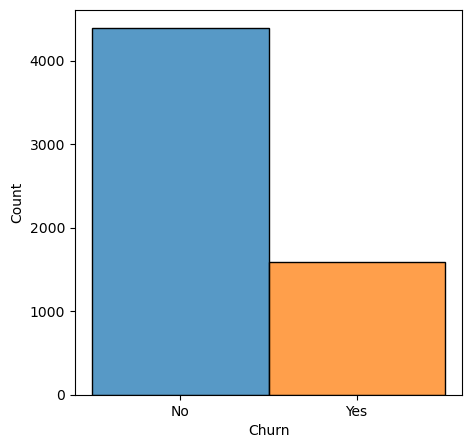

In [58]:
# Определение размеров диаграммы
plt.subplots(figsize=(5, 5))

# Построение распределения целевого признака
sns.histplot(data_df[data_df["Churn"] == 'No']["Churn"])
sns.histplot(data_df[data_df["Churn"] == 'Yes']["Churn"])

# Вывод диаграммы
plt.show()


## Анализ количественных признаков

Построим распределение вероятности для количественных признаков и рассмотрим аномальные значения, которые возможно будут присутствовать в распределении. В случае выбросов, исключим данные значения из рассмотрения. Для усечения данных будем использовать правило 3-х сигм.

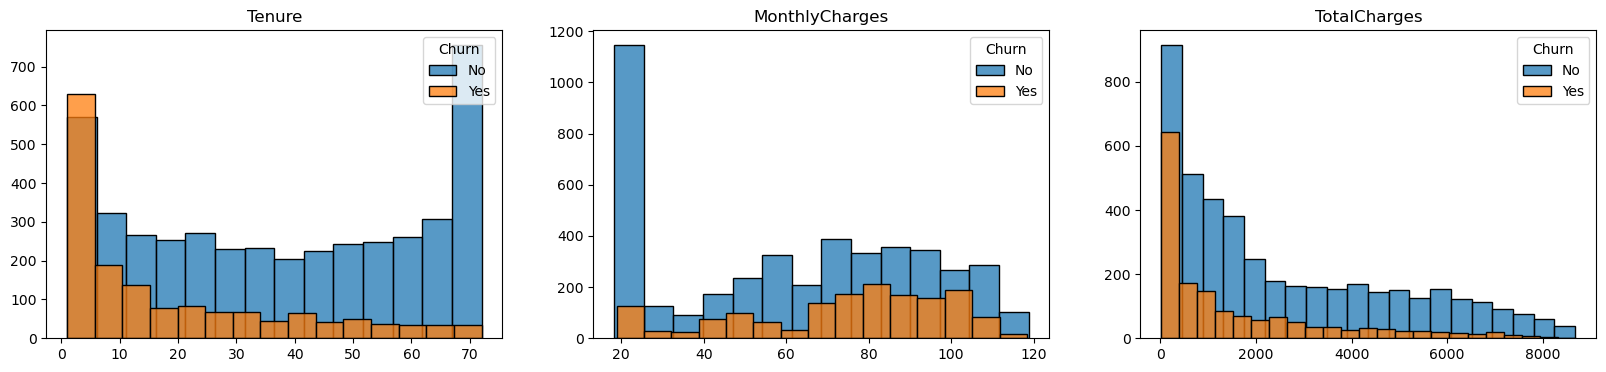

In [59]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['Tenure', 'MonthlyCharges', 'TotalCharges'], axes.flat):
    sns.histplot(data_df.query('Churn=="No"')[column], label='No', ax=ax).set_title(column)
    sns.histplot(data_df.query('Churn=="Yes"')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграмм
plt.show()

Из полученных диаграмм видно, что признаки Tenure, MonthlyCharges, TotalCharges имеют характер распределения близкий к нормальному, а именно:

* признаки Tenure и TotalCharges представлены усеченной формой распределения, с резким снижением частот;
* признак MonthlyCharges представлен бимодальной гистограммой, что возможно свидетельствует о смешении двух различных категорий клиентов.
Кроме того, в признаке Tenure прослеживается четкая зависимость между увеличением количества месяцев, на протяжении которых человек является клиентом, и уменьшением оттока клиентов. Также присутствует обратная связь между размером ежемесячного платежа и оттоком.

Дополнительно можно отметить, что аномальные значения вероятностей, которые могли бы искажать распределения, отсутствуют.

## Поиск зависимостей
Используя матрицу рассеивания отразим парное отношение признаков и их распределение.

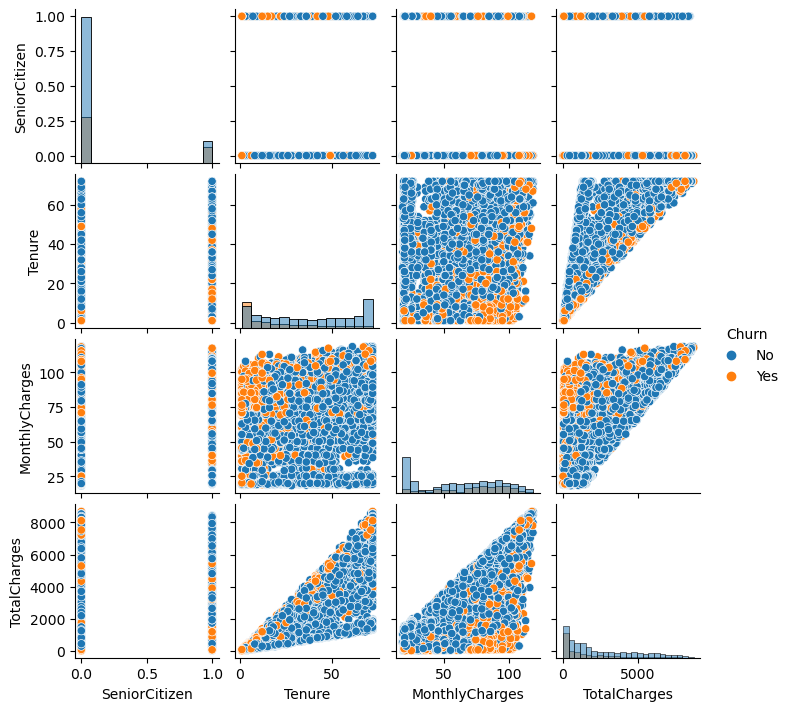

In [60]:
# Вывод пар признаков в матричном виде
sns.pairplot(data_df, hue='Churn', diag_kind='hist', height=1.8)

# Вывод диаграммы
plt.show()

Матрица рассеивания показывает, что имеющиеся численные признаки плохо классифицируются по оттоку клиентов. Тем не менее, признаки TotalCharges, Tenure и MonthlyCharges имеют достаточно высокий характер силы связи.

Также можно обратить внимание, что полученная матрица рассеивания не отражает всех признаков и полной картины линейных взаимосвязей, поэтому имеет смысл ввести дополнительные признаки посредством применения бинарного кодирования (one-hot encoding) к категориальным значениям.

Далее рассмотрим добавление новых признаков и выберем из них самые релевантные.

In [61]:
# Конструирование новых признаков
features_df = pd.get_dummies(data_df, columns=data_df.columns[data_df.dtypes==object], drop_first=True)

# Вывод новых признаков
features_df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1869,0,72,24.10,1734.65,1,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4528,0,44,88.15,3973.20,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6344,1,38,74.95,2869.85,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
6739,0,4,55.90,238.50,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
432,0,2,53.45,119.50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
features_df.isna().sum()

SeniorCitizen                            0
Tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

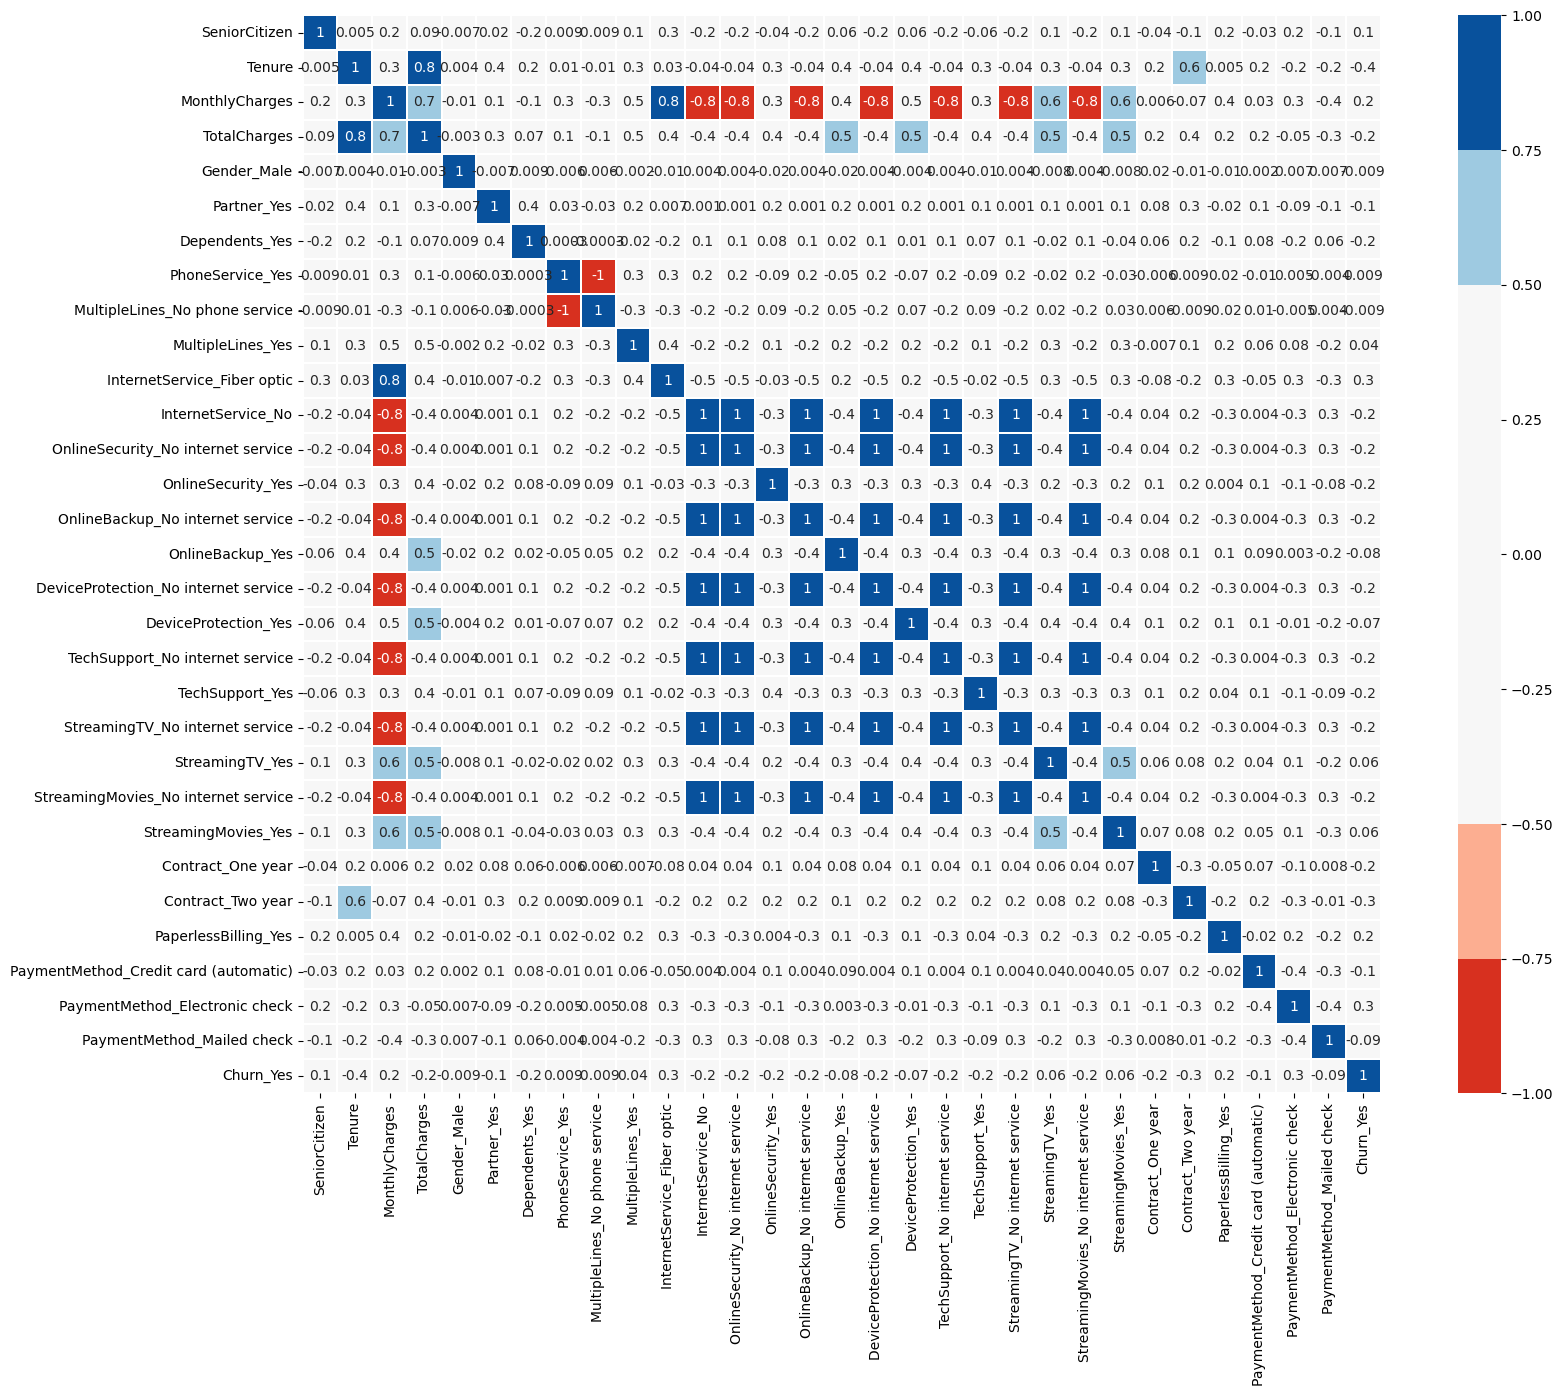

In [63]:
# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    features_df.corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

В соответствии с полученной матрицей корреляции можно сказать, что в результате применения бинарного кодирования к категориальным значениям, полученный набор признаков избыточен. То есть 6-ть идентичных признаков: OnlineSecurity_NoIS, OnlineBackup_NoIS, DeviceProtection_NoIS, TechSupport_NoIS, StreamingTV_NoIS, StreamingMovies_NoIS можно удалить. Они полностью дублируют информацию, отраженную в признаке InternetService_No. Также наличие признака MultipleLines_NoPS является лишним, поскольку признаки MultipleLines_NoPS и PhoneService_Yes взаимоисключающие.

На матрице корреляции есть как положительные, так и отрицательные сильные связи между признаками, но с целевым признаком линейные связи очень слабые. Тем не менее, при наличии слабых корреляций между признаками и целевой переменной сохраняется возможность прогноза оттока клиентов.

В заключение можно сказать, что, как и ранее предполагали в анализе категориальных признаков, влияние признаков Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies на отток клиентов минимально. В последующем рассмотрим возможность исключения слабых признаков из анализа.

In [64]:
# Удаление признаков идентичных признаку "InternetService_No"
result_df = features_df.drop(columns=['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'])

# Удаление признака идентичного признаку "PhoneService_Yes"
result_df.drop(columns=['MultipleLines_No phone service'], inplace=True)

## Вывод
В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.

Также сформулируем ряд предположений, которые проверим в ходе работы:

* Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;
* Подтвердим гипотезу об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes и StreamingMovies_Yes на отток;
* Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.

# 3. Построение моделей для прогнозирования оттока
## Исходные данные
Разобьем исходные данные на тренировочную и контрольную выборки.

In [65]:
# Определение тренировочной и контрольной выборок
X_train, X_test, y_train, y_test = train_test_split(
    result_df.iloc[:, :-1].values, result_df.iloc[:, -1].values, random_state=17, stratify=result_df['Churn_Yes'])

## Нормализация данных
Поскольку не все алгоритмы машинного обучения могут хорошо работать с данными из разного диапазона, выполним масштабирование количественных признаков в диапазоне от 0 до 1.

In [66]:
# Нормализация значений признаков
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

## Модели машинного обучения
Рассмотрим ряд базовых алгоритмов классификации с целью определения лучшего алгоритма для прогноза оттока клиентов. В качестве метрики оценки алгоритма выберем показатель площади под кривой ошибок (ROC_AUC), что позволит в целом оценить качество классификации алгоритма. После определения лучшего алгоритма классификации проведем гиперпараметрическую настройку для оптимизации модели и оценим работу финальной модели на тестовой выборке данных.

In [67]:
from sklearn.neighbors import KNeighborsClassifier  #Импорт классификатора "K-ближайших соседей"
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier #Импорт классификатора "Градиентный бустинг" и "Рандомный лес"
from sklearn.linear_model import LogisticRegression  #Импорт классификатора "Логистическая регрессия"
from sklearn.svm import SVC  #Импорт классификатора "Метод опорных векторов"

#Импорт методов автоматической обработки данных
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

#Импорт метрик качества классификации
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [68]:
# Параметры базовых алгоритмов

knn_params = {'n_neighbors' : np.arange(1, 10, 1)}  # Параметры для классификатора KNeighborsClassifier

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}   # Параметры для классификатора GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10),  # Параметры для классификатора RandomForestClassifier
              'min_samples_leaf': range(1, 7)}

svc_params = {'kernel': ['linear', 'rbf'], 
'C': np.arange(0.1, 1, 0.2)}                       # Параметры для классификатора SVC

lr_params = {'C': np.arange(0.2, 1, 0.1)} # Параметры для классификатора LogisticRegression


skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=17) # Параметры для кросс-валидации

In [69]:

# GridSearch для каждой из моделей

knn = KNeighborsClassifier()                       # Определение объекта классификатора KNeighborsClassifier
gbc = GradientBoostingClassifier(random_state=17)  # Определение объекта классификатора GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=17)      # Определение объекта классификатора RandomForestClassifier
svc = SVC(random_state=17, probability=True)       # Определение объекта классификатора SVC
lr = LogisticRegression(random_state=17,
                        #class_weight = {1:5},
                        solver = 'liblinear')      # Определение объекта классификатора LogisticRegression


gscv_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf)  # Определение объекта кросс-валидации для KNeighborsClassifier
gscv_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)  # Определение объекта кросс-валидации для GradientBoostingClassifier
gscv_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)  # Определение объекта кросс-валидации для RandomForestClassifier
gscv_svc = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf)  # Определение объекта кросс-валидации для SVC
gscv_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)     # Определение объекта кросс-валидации для LogisticRegression
gscv_gnb = GridSearchCV(estimator=gnb, param_grid=gnb_params, cv=skf)

knn_model = gscv_knn.fit(X_train, y_train)  # Обучение модели KNeighborsClassifier на кросс-валидации
gbc_model = gscv_gbc.fit(X_train, y_train)  # Обучение модели GradientBoostingClassifier на кросс-валидации
rfc_model = gscv_rfc.fit(X_train, y_train)  # Обучение модели RandomForestClassifier на кросс-валидации
svc_model = gscv_svc.fit(X_train, y_train)  # Обучение модели SVC на кросс-валидации
lr_model = gscv_lr.fit(X_train, y_train)    # Обучение модели LogisticRegression на кросс-валидации


In [70]:
# Получение лучших параметров для классификаторов полученных на кросс-валидации
print('Лучшие параметры:')
print(f'KNeighborsClassifier %s \nGradientBoostingClassifier %s \nRandomForestClassifier %s \nSVC %s \nLogisticRegression %s' %(
                                                                gscv_knn.best_params_,
                                                                gscv_gbc.best_params_,
                                                                gscv_rfc.best_params_,
                                                                gscv_svc.best_params_,
                                                                gscv_lr.best_params_))
                      

Лучшие параметры:
KNeighborsClassifier {'n_neighbors': 8} 
GradientBoostingClassifier {'learning_rate': 0.1} 
RandomForestClassifier {'min_samples_leaf': 4, 'n_estimators': 60} 
SVC {'C': 0.30000000000000004, 'kernel': 'linear'} 
LogisticRegression {'C': 0.6000000000000001}


In [74]:
knn = KNeighborsClassifier(n_neighbors=8)   
knn_model = knn.fit(X_train, y_train)

gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gbc_model = gbc.fit(X_train, y_train)

rfc = RandomForestClassifier(min_samples_leaf=4, n_estimators=60, random_state=17)
rfc_model = rfc.fit(X_train, y_train)

svc = SVC(C=0.30000000000000004, kernel='linear', random_state=17, probability=True)
svc_model = svc.fit(X_train, y_train)

lr = LogisticRegression(C=0.6000000000000001, random_state=17, solver = 'liblinear')  
lr_model = lr.fit(X_train, y_train)

# 4. Сравнение качества моделей 

## Метрики качества моделей

In [75]:
# Получение прогнозов для каждой модели

knn_predict = knn_model.predict(X_test)
gbc_predict = gbc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)
svc_predict = svc_model.predict(X_test)
lr_predict = lr_model.predict(X_test)


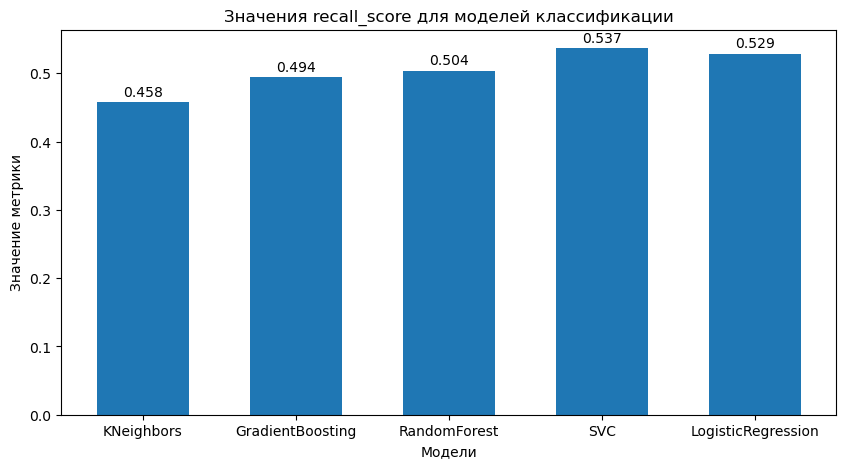

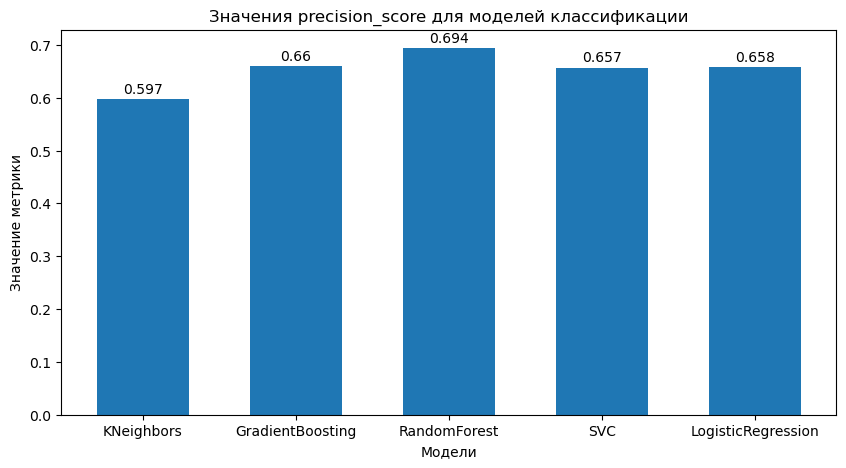

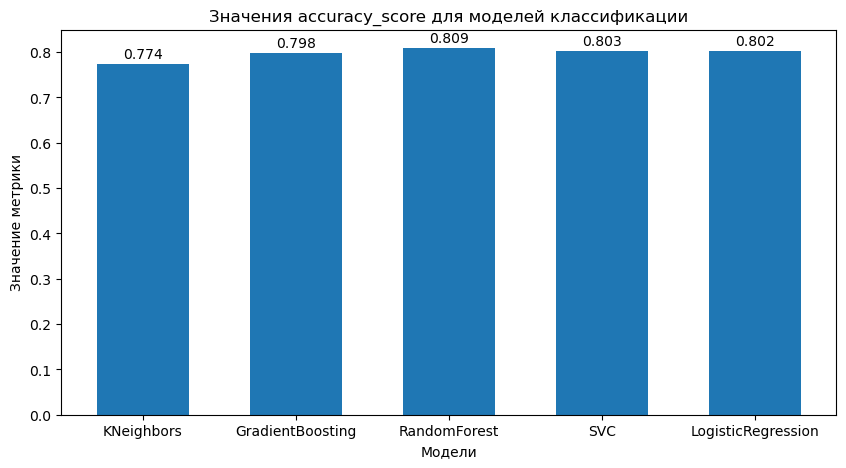

In [76]:
# Получение значений полноты моделей классификаторов
metrics_scores = [recall_score, precision_score, accuracy_score]
predicts = [knn_predict, gbc_predict, rfc_predict, svc_predict, lr_predict]
models_names = ['KNeighbors', 'GradientBoosting', 'RandomForest', 'SVC', 'LogisticRegression']
scores_names = ['recall_score', 'precision_score', 'accuracy_score']
values_list = []
for i, score in enumerate(metrics_scores):
    for predict in predicts:
        values_list.append(round(score(y_test, predict),3))    
    
    x = np.arange(len(models_names))  # Список координат столбцов по x
    
    fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
    rects = ax.bar(x, values_list, 0.6)  # Определение колонок для данных
    
    # Указание подписей для осей, таблицы, легенды
    ax.set_ylabel('Значение метрики')
    ax.set_xlabel('Модели')
    ax.set_title(f'Значения {scores_names[i]} для моделей классификации')
    ax.set_xticks(x)
    ax.set_xticklabels(models_names)
    
    # Определение функции для отображения столбцов с аннотациями
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            # Задание параметров для аннотаций
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                        xytext=(0, 2),    # Высота текста над столбцами
                        # Расположение текста относительно столбцов
                        textcoords="offset points",  
                        ha='center', va='bottom')
    
    autolabel(rects)  # Выполнение функции
    values_list = []

plt.show()

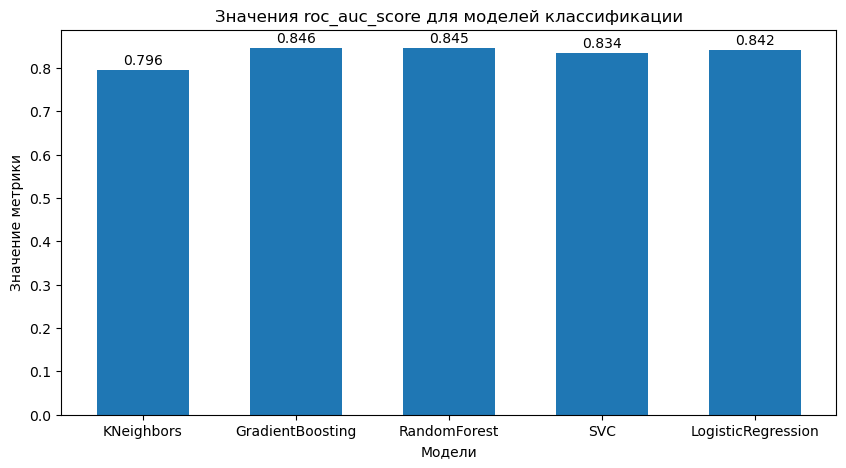

In [36]:
# Получение значений ROC-AUC score для моделей классификаторов

auc_list = []
models = [knn_model, gbc_model, rfc_model, svc_model, lr_model]
for model in models:
    proba = model.predict_proba(X_test)
    auc_list.append(round(roc_auc_score(y_test, proba[:, 1]),3))
    
x = np.arange(len(models_names))  # Список координат столбцов по x

fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
rects = ax.bar(x, auc_list, 0.6)  # Определение колонок для данных

# Указание подписей для осей, таблицы, легенды
ax.set_ylabel('Значение метрики')
ax.set_xlabel('Модели')
ax.set_title('Значения roc_auc_score для моделей классификации')
ax.set_xticks(x)
ax.set_xticklabels(models_names)

# Определение функции для отображения столбцов с аннотациями
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Задание параметров для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Расположение текста относительно столбцов
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(rects)  # Выполнение функции
values_list = []

plt.show()

## Вывод
Наибольшими показателями метрики качества roc_auc_score обладают модели классификаторов GradientBoosting, LogisticRegression и RandomForest.
В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие неплохую метрику качества ROC_AUC:

Логистическая регрессия - 0.842;
Градиентный бустинг - 0.846;
Случайный лес - 0.845.
Учитывая, что основной задачей является прогноз ухода клиентов, в последующем выполним расчет и сравнение оценок моделей по метрике "полнота" (Recall). Данная метрика позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти.

Поскольку в области принятия решений предпочтительнее опираться на вероятность, также определим значения вероятностей оттока клиентов. Предсказание вероятности ухода позволит понять к какому из клиентов следует обратиться в первую очередь, а к кому в последнюю.

## Матрицы ошибок

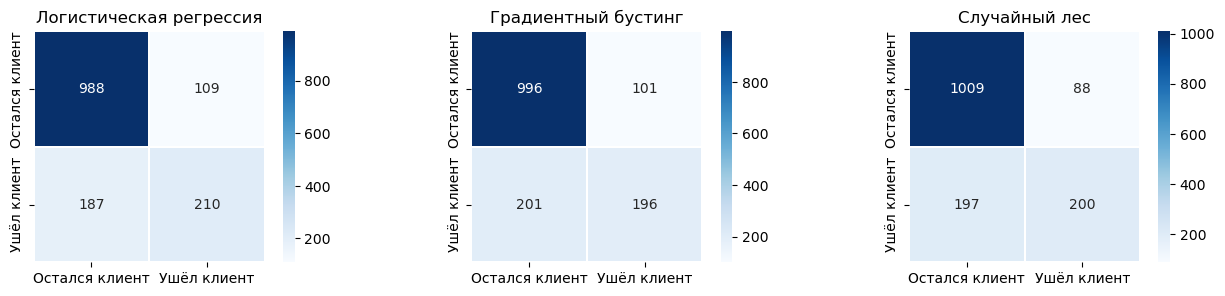

In [77]:
# Определение размера диаграмм
fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# Список целевых переменных предсказанных моделями
y_predicts = [lr_predict, gbc_predict, rfc_predict]

# Список наименований моделей
name_models = ['Логистическая регрессия', 'Градиентный бустинг', 'Случайный лес']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='Blues', square=True, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

Из результатов сравнения моделей видно, что Логистическая регрессия превосходит остальные алгоритмы по показателю полноты (Recall). При 397 фактических случаев ухода клиентов, 210 оказались правильными. По показателю точности (Precision) на первом месте Градиентный бустинг. 

## Вероятность оттока
Определим функцию сравнения прогнозных вероятностей оттока клиентов, полученных с помощью модели машинного обучения, с фактическими исходами.

In [78]:
def predict_probabilities(model, X, y):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(X)
    
    # Выборка вероятностей для ушедших клиентов с
    # округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:, 1], 1)
    
    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)
    
    # Выборка истинных исходов ушедших клиентов
    true_churn = y==1
    
    # Определение доли истинных исходов ушедших клиентов
    # или реальная вероятность ухода клиента
    true_proba = [np.mean(true_churn[predict_churn==value]) for value in value_churn.index]
        
    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)
    
    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Кол. ушедших', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)
    
    # Возвращение датафрейма
    return result_df

## Градиентный бустинг

In [80]:
# Вывод вероятностей ухода клиентов
predict_probabilities(gbc_model, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,32,0.843750
1,0.8,50,0.820000
2,0.7,80,0.687500
3,0.6,73,0.575342
4,0.5,139,0.525180
5,0.4,123,0.373984
6,0.3,138,0.318841
7,0.2,181,0.143646
8,0.1,326,0.116564
9,0.0,352,0.014205


## Логистическая регрессия

In [81]:
# Вывод вероятностей ухода клиентов
predict_probabilities(lr_model, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,2,1.000000
1,0.8,48,0.833333
2,0.7,106,0.679245
3,0.6,112,0.642857
4,0.5,111,0.450450
5,0.4,124,0.387097
6,0.3,142,0.288732
7,0.2,209,0.196172
8,0.1,282,0.070922
9,0.0,358,0.030726


Из полученных результатов прогноза оттока клиентов можно сказать, что Градиентный бустинг показывает более близкую вероятность ухода клиента к фактическому исходу, чем Логистическая регрессия. 

Поскольку вероятность оттока клиентов позволяет оценить не только степень уверенности потери клиента, но и понять с какой группой клиентов следует работать в первую очередь, допускаю, что из трех выбранных моделей для Компании выгоднее смотрится Градиентный бустинг.

## Вывод
Подводя итоги по проекту можно сделать следующие выводы:

* Раннее выдвинутое предположение о высокой степени связи признаков Tenure, MonthlyCharges, TotalCharges с целевой переменной подтвердилось. Так как данные признаки были определены как значимые и вошли в модель прогноза оттока (разделы "Поиск зависимостей" и "Отбор признаков");
- Также подтвердилась гипотеза об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes, StreamingMovies_Yes на отток клиентов;
* Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). 